### Data

Each row of csvImages 10k x 784.csv contains the gray scale values of a 28 x 28 image. Load this data into a pandas dataframe. Convert the dataframe to a numpy array using pandas.values. Print the shape of the data.

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import gdown

In [294]:
# set random state
seed = 10
random.seed(seed)
np.random.seed(seed)

In [295]:
gdown.download('https://drive.google.com/uc?id=122QQTEz20RDonnDb0PxaqS3lul9lIQ7V', "image")

Downloading...
From: https://drive.google.com/uc?id=122QQTEz20RDonnDb0PxaqS3lul9lIQ7V
To: /content/image
100%|██████████| 17.7M/17.7M [00:00<00:00, 71.7MB/s]


'image'

In [296]:
# read data
raw_df = pd.read_csv("image")
# print data shape
print(f'Input data(data frame) has {raw_df.shape[0]} rows and {raw_df.shape[1]} columns.\n')
# convert data to numpy array
raw_data = raw_df.values
print(f'The raw_data(numpy array) has {len(raw_data)} rows and {len(raw_data[0])} columns.\n')

Input data(data frame) has 9999 rows and 784 columns.

The raw_data(numpy array) has 9999 rows and 784 columns.



Normalize by dividing each value by 255. In order to display the images, reshape the array so each image is 28 x 28 using numpy.ndarray.reshape.

In [297]:
# normalize data
normed_data = raw_data / 255.0
# reshape the normed data
img_data = normed_data.reshape(len(normed_data),28,28)
# show shape of img_data
img_data.shape

(9999, 28, 28)

Use matplotlib.plot.imshow and matplotlib.plot.subplot to give a plot of the first five images using the 'gray' colour map.

In [298]:
# define a helper function
def display_data(data, start=0, end=5, camp='gray'):
  for i in range(start, end):
      plt.subplot(1, end-start, i -start + 1)  # 1 row, 5 columns, i+1 denotes the current subplot
      plt.imshow(data[i], cmap=camp)  # Display the image
      plt.axis('off')  # Turn off the axes

  plt.show()

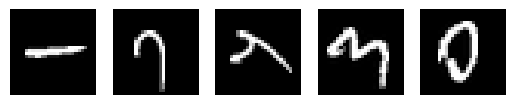

In [299]:
# display first 5 images
display_data(img_data)

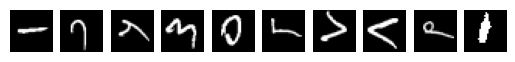

In [300]:
# display first 10 images
display_data(img_data, start=0, end=10)

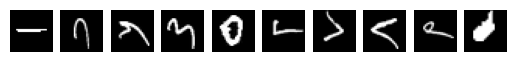

In [301]:
# display first images from 50 to 59
display_data(img_data, start=50, end=60)

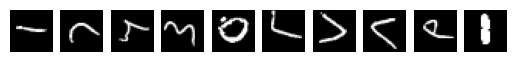

In [302]:
# display first images from 500 to 509
display_data(img_data, start=500, end=510)

Based on the visual representations above, it can be deduced that each image corresponds to the result of its (index + 1) % 10. For instance, the image at position 50 corresponds to the number (50 + 1) % 10 = 1, and similarly, the image at position 309 corresponds to the number (309 + 1) % 10 = 0. Therefore, we can create the labels of images based on their positions.

In [303]:
# get the labels for images from their positions
true_label = np.array([ (i+1) % 10 for i in range(len(img_data))])
# check if the label is correctly created
true_label[:10]

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In order to put the data back in the original shape for input to the neural network, reshape each image to be 784 (one-dimensional).

In [304]:
# show shape of normed_data
normed_data.shape

(9999, 784)

### Clustering

Use sklearn.decomposition.PCA.fit_transform to do a PCA transformation with n_components = 40. This reduces the dimension of each image to a size that is more manageable, while keeping the most important aspects of the data.



In [305]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score

In [306]:
# create a PCA model with n_components = 40
pca = PCA(n_components=40)
# transfer data to low dimension
ld_data = pca.fit_transform(normed_data)

 Create at least 8 different clustering models using k-means, (agglomerative and divisive) hierarchical, and DBSCAN clustering. Calculate the silhouette score for each model and tabulate the results.

In [307]:
# create list to save models, labels, and silhouette cores
model_names = []
n_of_clusters =[]
labels = []
unique_labels = []
label_counts = []
scores = []

In [308]:
# from urllib.parse import uses_query
def add_label_counts(label):
  labels.append(label)
  u_labels, counts = np.unique(np.array(label), return_counts= True)
  unique_labels.append(u_labels)
  label_counts.append(counts)

In [309]:
# kmeans model 1
model_name = "K-Means, algorithm= elkan, max_iter=500"
model_names.append(model_name)
model = KMeans(n_init= 'auto' , n_clusters=10, algorithm= 'elkan', max_iter=500, random_state= 45)
# models.append(model)
label = model.fit_predict(ld_data)
add_label_counts(label)
score = silhouette_score(ld_data, label)
print(f'Silhouette score of {model_name}: {score:.3f}')
scores.append(score)

Silhouette score of K-Means, algorithm= elkan, max_iter=500: 0.130


In [310]:
# kmeans model 2
model_name = "K-Means, algorithm= lloyd, max_iter=1000"
model_names.append(model_name)
model = KMeans(n_init='auto', n_clusters=10, algorithm= 'lloyd', max_iter=1000, random_state=35)
# models.append(model)
label = model.fit_predict(ld_data)
add_label_counts(label)
score = silhouette_score(ld_data, label)
print(f'Silhouette score of {model_name}: {score:.3f}')
scores.append(score)

Silhouette score of K-Means, algorithm= lloyd, max_iter=1000: 0.130


In [311]:
# agglomerative model 1
model_name = "Agglomerative, linkage= ward"
model_names.append(model_name)
model = AgglomerativeClustering(n_clusters=10, linkage='ward')
# models.append(model)
label = model.fit_predict(ld_data)
add_label_counts(label)
score = silhouette_score(ld_data, label)
print(f'Silhouette score of {model_name}: {score:.3f}')
scores.append(score)

Silhouette score of Agglomerative, linkage= ward: 0.113


In [312]:
# agglomerative model 2
model_name = "Agglomerative, linkage= average"
model_names.append(model_name)
model = AgglomerativeClustering(n_clusters=10, linkage='average')
# models.append(model)
label = model.fit_predict(ld_data)
add_label_counts(label)
score = silhouette_score(ld_data, label)
print(f'Silhouette score of {model_name}: {score:.3f}')
scores.append(score)

Silhouette score of Agglomerative, linkage= average: 0.152


In [313]:
# divisive model 1
model_name = "Divisive, linkage= single"
model_names.append(model_name)
ward_matrix = linkage(ld_data, 'single')
label = fcluster(ward_matrix, t=10, criterion="maxclust")
add_label_counts(label)
score = silhouette_score(ld_data, label)
print(f'Silhouette score of {model_name}: {score:.3f}')
scores.append(score)

Silhouette score of Divisive, linkage= single: 0.082


In [314]:
# divisive model 2
model_name = "Divisive, linkage= centroid"
model_names.append(model_name)
ward_matrix = linkage(ld_data, 'centroid')
label = fcluster(ward_matrix, t=10, criterion="maxclust")
add_label_counts(label)
score = silhouette_score(ld_data, label)
print(f'Silhouette score of {model_name}: {score:.3f}')
scores.append(score)


Silhouette score of Divisive, linkage= centroid: 0.084


In [315]:
# dbscan model 1
model_name = "DBSCAN, eps=4, min_samples=20"
model_names.append(model_name)
model = DBSCAN(eps=4, min_samples=20)
label = model.fit_predict(ld_data)
add_label_counts(label)
score = silhouette_score(ld_data, label)
print(f'Silhouette score of {model_name}: {score:.3f}')
scores.append(score)

Silhouette score of DBSCAN, eps=4, min_samples=20: 0.187


In [316]:
# dbscan model 2
model_name = "DBSCAN, eps=3.5, min_samples=15"
model_names.append(model_name)
model = DBSCAN(eps=3.5, min_samples=15)
label = model.fit_predict(ld_data)
add_label_counts(label)
score = silhouette_score(ld_data, label)
print(f'Silhouette score of {model_name}: {score:.3f}')
scores.append(score)

Silhouette score of DBSCAN, eps=3.5, min_samples=15: 0.141


In [317]:
# create a dataframe to display scores
score_df = pd.DataFrame({'name': model_names, 'cluster_label': labels, 'label_counts': label_counts, 'silhouette_score': scores})
# display the scores
score_df

name  \
0   K-Means, algorithm= elkan, max_iter=500   
1  K-Means, algorithm= lloyd, max_iter=1000   
2              Agglomerative, linkage= ward   
3           Agglomerative, linkage= average   
4                 Divisive, linkage= single   
5               Divisive, linkage= centroid   
6             DBSCAN, eps=4, min_samples=20   
7           DBSCAN, eps=3.5, min_samples=15   

                                       cluster_label  \
0  [8, 2, 6, 5, 7, 8, 3, 1, 0, 6, 8, 2, 6, 5, 7, ...   
1  [5, 2, 8, 0, 6, 5, 9, 3, 7, 8, 5, 4, 8, 0, 6, ...   
2  [0, 7, 9, 0, 2, 4, 6, 5, 4, 1, 0, 8, 9, 0, 2, ...   
3  [7, 7, 7, 7, 8, 7, 7, 7, 7, 6, 7, 7, 7, 7, 8, ...   
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
5  [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...   
6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1,...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1,...   

                                        label_counts  silhouette_score  
0  [1146, 806, 751, 910, 756, 1034, 1321, 848, 11...          0.130382  
1  [1004, 759, 1338, 794, 740, 1164, 844, 1168, 1...          0.130084  
2  [1882, 483, 987, 552, 1092, 876, 856, 1294, 87...          0.112747  
3       [11, 287, 171, 335, 4, 2, 218, 8078, 887, 6]          0.152149  
4                  [9990, 1, 1, 1, 1, 1, 1, 1, 1, 1]          0.082054  
5                  [1, 1, 1, 1, 2, 9989, 1, 1, 1, 1]          0.083897  
6                                        [923, 9076]          0.186856  
7                          [1920, 7634, 365, 57, 23]          0.140682

Select the best model for the use case and justify your choice in markdown.

Based on the preceding outcome, it's evident that the "DBSCAN with eps=4 and min_samples=20" delivers the highest silhouette score. However, this model only includes two clusters, making it less practical.<br>
For the similar reason, the other DBSCAN model yields only four clusters (excluding the noise points), indicating that it is not a suitable model in this context.<br>
In models with 10 clusters, the "Agglomerative with average linkage" attains the highest silhouette score. However, a drawback of this model is that over 80% of the samples (8078) belong to cluster 6, which differs from the actual scenario.<br>
One will notice that the silhouette score of model "K-Means, algorithm= elkan" is a little bit higher than the model "K-Means, algorithm= lloyd", and the number of samples in the clusters of this model are relatively balanced. Therefore, we can choose the first model as the best model.


"K-Means, algorithm= elkan" is chosed as the best model, which has 10 clusers. The largest cluster comprises 1283 samples, while the smallest contains 756 samples. It's notable that the best model chosen doesn't achieve a perfect division of samples, as evidenced by its silhouette score of only 0.13.

In [318]:
# choose the best cluster model
best_cluster = labels[0]

### t-SNE
Use sklearn.manifold.TSNE to perform a dimensional reduction on the dataset using t-SNE with n_components = 2. Try at least 8 different ways of doing this by using different choices for perplexity, n_iter, and metric. Provide a scatter plot using the t-SNE components as coordinates and colour the points according to cluster membership. Print the Roman digit corresponding to each cluster at its centroid. Using markdown, explain which plot provides the best visualization. You may wish to revisit the clustering models in step 2 to improve your results.

In [321]:
from sklearn.manifold import TSNE
import io
import sys

In [322]:
n_iters = [300, 500]
perplexities = [10, 30]
metrics = ['euclidean', 'chebyshev']

In [323]:
results = []
kl_convs = []
params = []
# Loop over different parameters
for i, n_iter in enumerate(n_iters):
    for j, perplexity in enumerate(perplexities):
        for k, metric in enumerate(metrics):
            # Perform t-SNE
            tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, metric=metric, random_state=42, verbose=0)
            X_tsne = tsne.fit_transform(ld_data)
            kl_convs.append(tsne.kl_divergence_)
            results.append(X_tsne)
            params.append({'n_iter': n_iter, 'perplexity': perplexity, 'metric': metric})


In [324]:
def display_txt(t):
  for number in range(10):
    # get the data points belong to the same number
    selected = np.array([ x for row, x in enumerate(t) if (row+1) % 10 == number])
    # get the center position of the current data points set
    tx, ty = selected.mean(axis=0)
    plt.text(tx, ty, str(number), fontdict={'weight': 'bold', 'size': 10})

Creat different t-SNE models and plot both on true labels and cluster labels

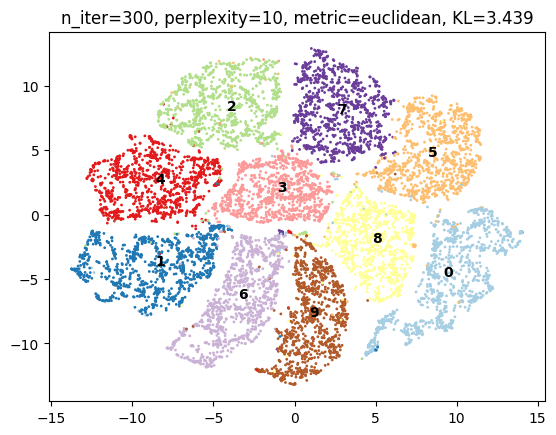

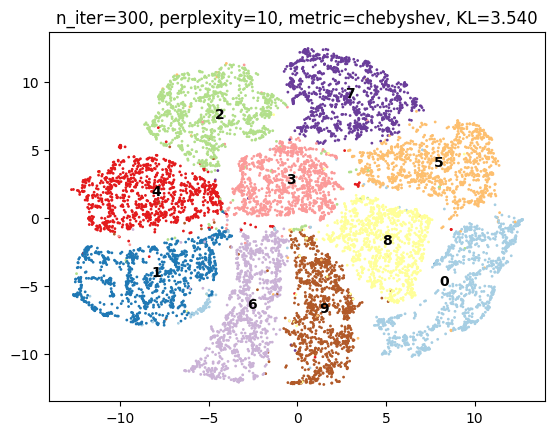

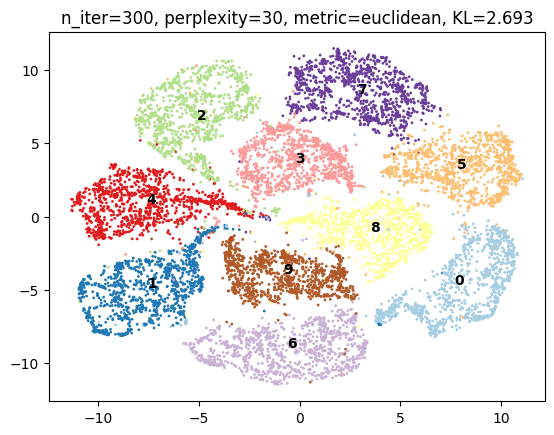

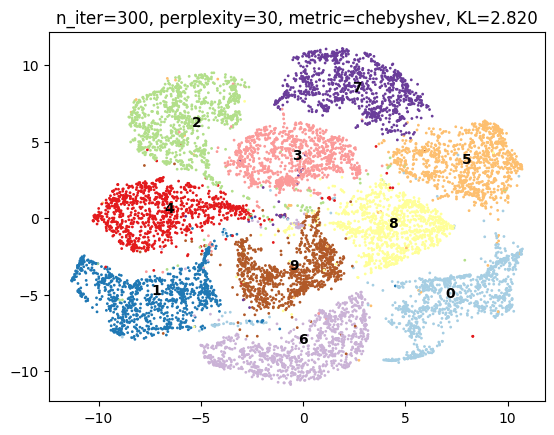

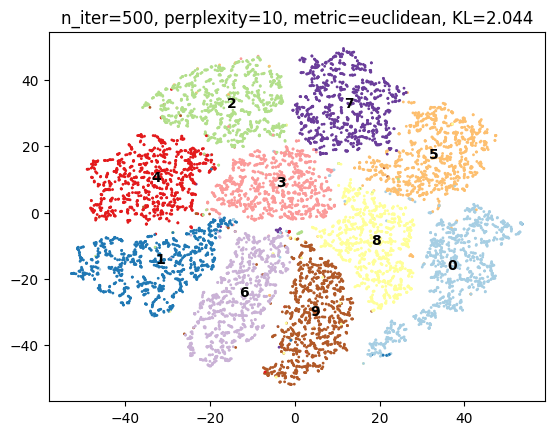

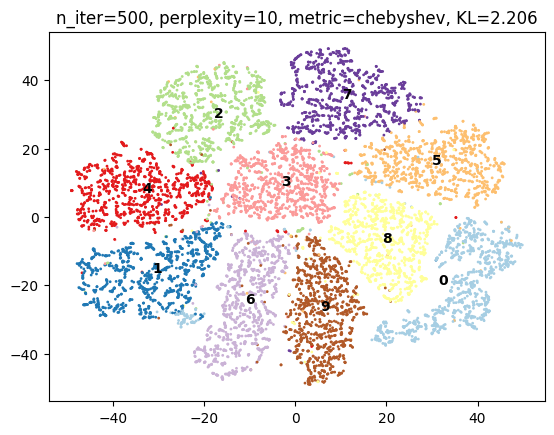

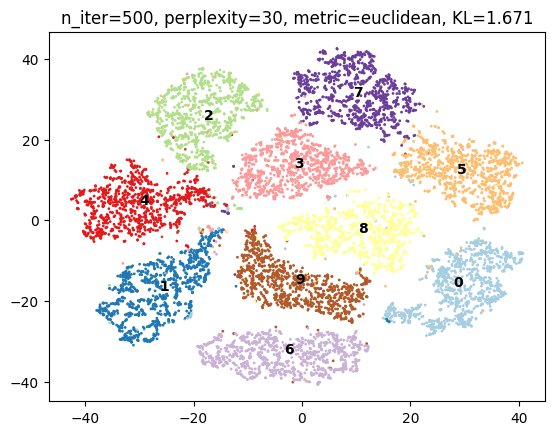

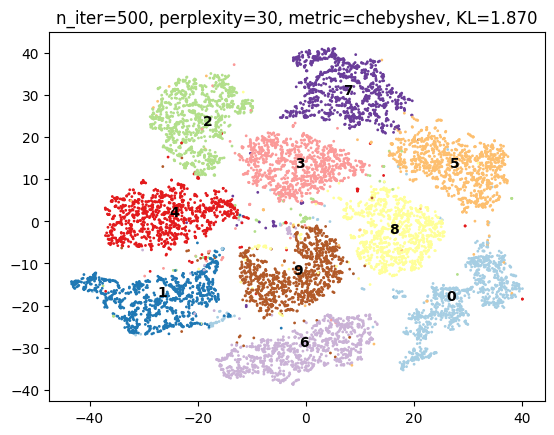

In [325]:
# plot the tsne models on true labels
for t, p, k in zip(results, params, kl_convs):
  plt.scatter(t[:, 0], t[:, 1], c=true_label, cmap='Paired', s=1)
  plt.title(f"n_iter={p['n_iter']}, perplexity={p['perplexity']}, metric={p['metric']}, KL={k:.3f}")
  display_txt(t)
  plt.show()

Based on the visualizations presented above, it is evident that the 6th model configured with "n_iter=500, perplexity=30, metric=euclidean" exhibits the lowest KL Convergence value. The data points in distinct clusters are almost perfectly separated, and those belonging to the same cluster are closely grouped together. Therefore, this particular configuration should be considered the best model choice.

We will visualize the t-SNE models using the labels of the best cluster model we have to evaluate the performance of the clustering model. We first need to **determine the actual number associated with each cluster label**.

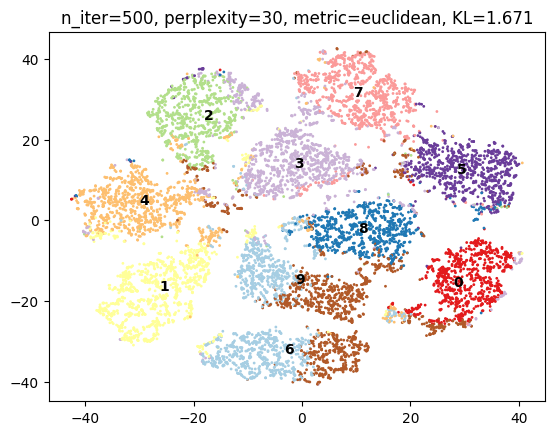

In [327]:
# plot with the best t-SNE model, using labels from the best cluster model
for t, p, k in zip([results[6]], [params[6]], [kl_convs[6]]):
  for cluster_labels in [labels[0]]:
    plt.scatter(t[:, 0], t[:, 1], c=cluster_labels, cmap='Paired', s=1)
    plt.title(f"n_iter={p['n_iter']}, perplexity={p['perplexity']}, metric={p['metric']}, KL={k:.3f}")
    display_txt(t)
    plt.show()

By examining both plots using true labels and using the cluster labels, we can establish the mapping from cluster labels to the actual numbers. For instance, the "red" color corresponds to the number "4" in the true labels, while it appears in the region associated with number "0" in the cluster labels. Consequently, by associating colors with numbers, we can deduce the mapping from the cluster labels (from label 0 to label 9) to real numbers should be [6, 8, 2, 7, 0, 4, 3, 5, 1, 9].

In [344]:
# a function to map label to real number
def get_real_number(label_list):
  real_numbers = [6, 8, 2, 7, 0, 4, 3, 5, 1, 9]
  number_labels = [real_numbers[label] for label in label_list]
  return np.array(number_labels)
# map cluster labels to real number
number_of_cluster = get_real_number(best_cluster)

In [345]:
# check the mapping result
print(f'original labels:\n {best_cluster[:10]}')
print(f'mapping labels:\n {number_of_cluster[:10]}')

original labels:
 [8 2 6 5 7 8 3 1 0 6]
mapping labels:
 [1 2 3 4 5 1 7 8 6 3]


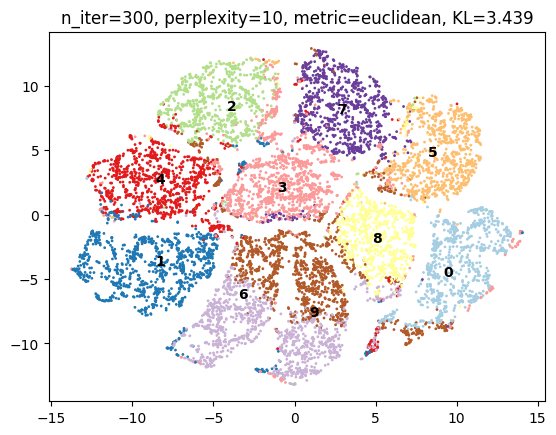

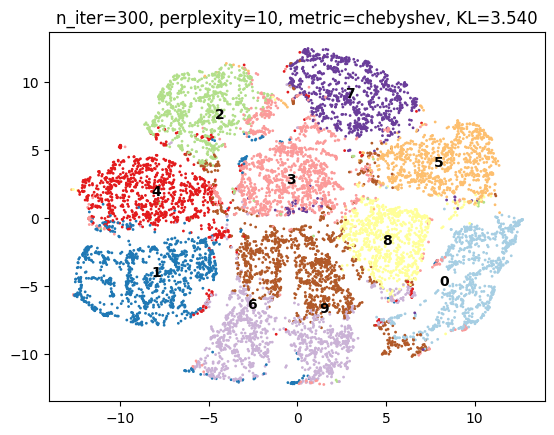

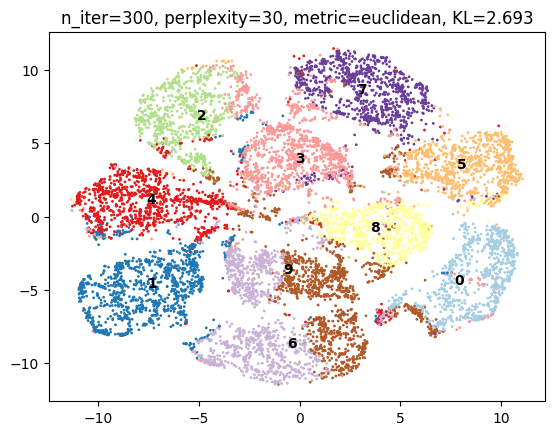

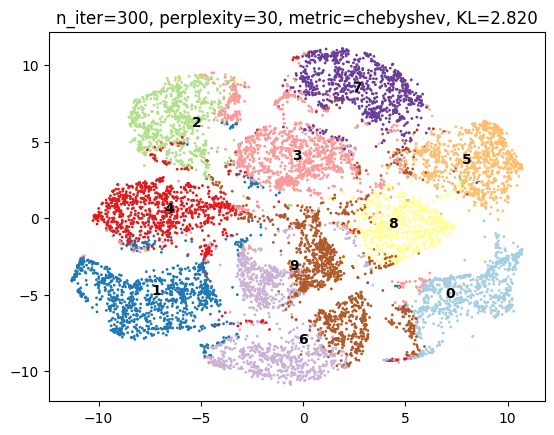

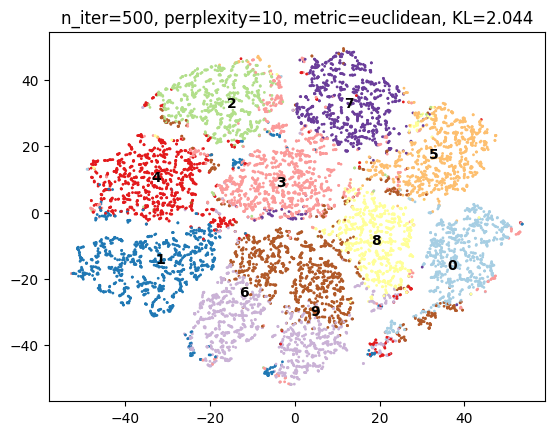

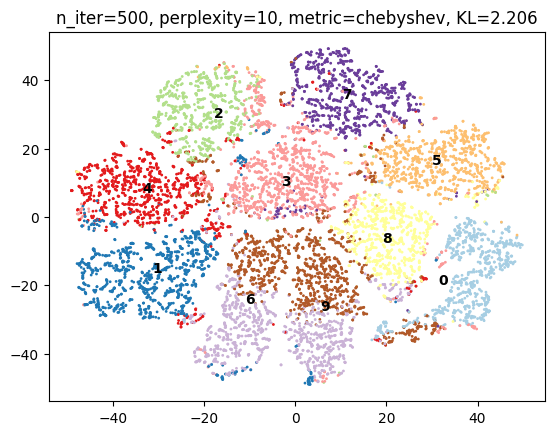

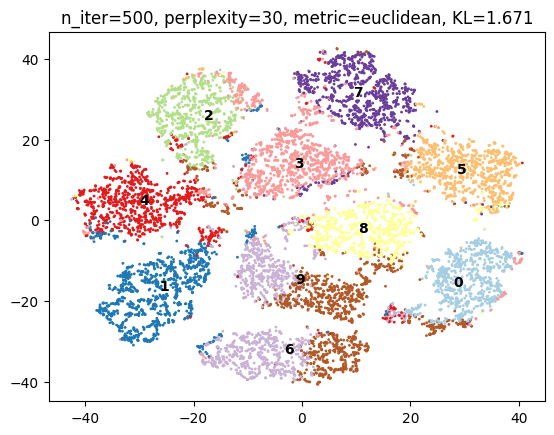

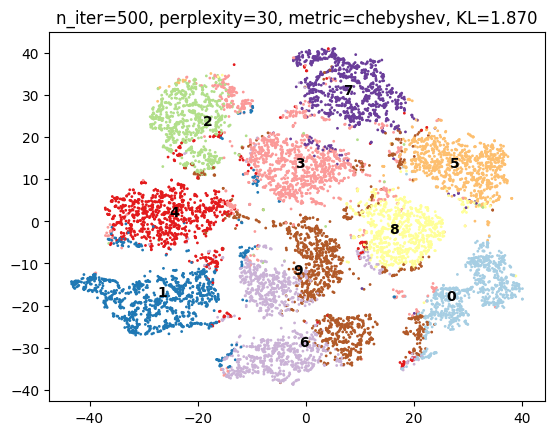

In [330]:
# plot the t-SNE using the mapped cluster labels
for t, p, k in zip(results, params, kl_convs):
  for cluster_labels in [labels[0]]:
    plt.scatter(t[:, 0], t[:, 1], c=number_of_cluster, cmap='Paired', s=1)
    plt.title(f"n_iter={p['n_iter']}, perplexity={p['perplexity']}, metric={p['metric']}, KL={k:.3f}")
    display_txt(t)
    plt.show()

From the above plots, we can see that t-SNE models perform worse using the cluster labels than using the true labels. However, the 6th t-SNE model still shows a better visual than all other models. Therefore, the **6th t-SNE model is indeed the best model** in this scenario.

### Conclusions
Display again your best t-SNE plot of your best model and restate the hyperparameter choices.

The best t-SNE model has the configuration of "n_iter=500, perplexity=30, metric=euclidean." And the best clustering model is KMeans with configuration of "n_init= 'auto' , n_clusters=10, algorithm= 'elkan', max_iter=500, random_state= 45". The plot is displayed below.

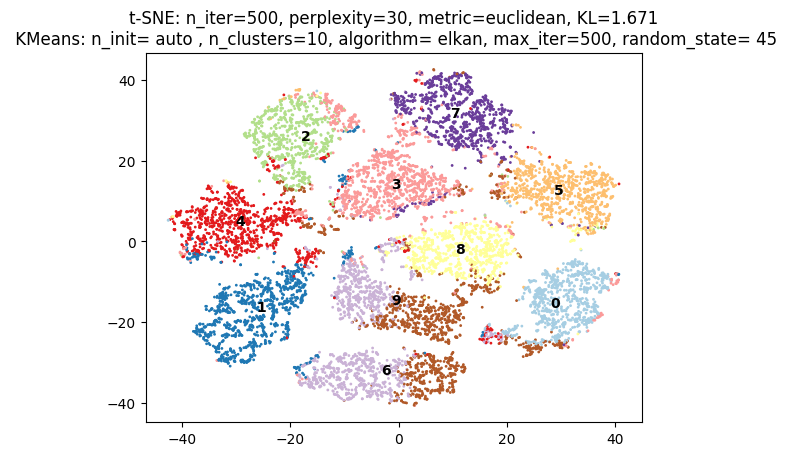

In [331]:
for t, p, k in zip([results[6]], [params[6]], [kl_convs[6]]):
  plt.scatter(t[:, 0], t[:, 1], c=number_of_cluster, cmap='Paired', s=1)
  plt.title(f"t-SNE: n_iter={p['n_iter']}, perplexity={p['perplexity']}, metric={p['metric']}, KL={k:.3f}\n KMeans: n_init= auto , n_clusters=10, algorithm= elkan, max_iter=500, random_state= 45")
  display_txt(t)
  plt.show()

Use markdown to discuss how well suited this data is for classification. Identify any classes which may be confused by a classification model.

In general, clustering models do not perform very well because of the high dimension (40 features after PCA). The best cluster model got a silhouette score of 0.13, which is not a perfect result. However, the t-SNE models do an excellent job of separating the data samples. We can see from the above visual that the best t-SNE model almost perfectly divides most of the numbers except for "6" and "9", though with some small overlapping areas in the edges of some numbers.

From the visual above, we can see that when using the classification model, the **numbers "6" and "9" are the most easily incorrectly classified**. If we look at the plot below, we will find the Arabic numbers "6" and "9" are similar to some extent; it is why the t-SNE model can not perfectly separate those two numbers.

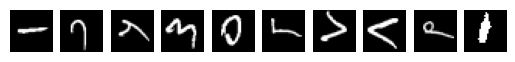

In [332]:
# display first 10 images
display_data(img_data, start=0, end=10)

We can retrieve some samples positioned more than 2 standard deviation away from the center position and have a look at those images.

In [333]:
def far_away(pos, center_x, center_y, std_x, std_y):
  return ((pos[0] > center_x + 2*std_x) or (pos[0] < center_x - 2*std_x) or (pos[1] > center_y + 2*std_y) or (pos[1] < center_y - 2*std_y))

In [334]:
error_data = []
cluster = results[6]
for number in range(10):
  # get the data points belong to the same number
  selected = np.array([ (x, row) for row, x in enumerate(cluster) if (row+1) % 10 == number])
  position = np.array([item[0] for item in selected])
  index = [item[1] for item in selected]
  # get the center position of the current data points set
  center_x, center_y = position.mean(axis=0)
  std_x, std_y = position.std(axis=0)
  far_aways = [x_row[1] for x_row in selected if far_away(x_row[0], center_x, center_y, std_x, std_y)]
  error_data.append(far_aways)

<ipython-input-334-5c637da19bd3>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected = np.array([ (x, row) for row, x in enumerate(cluster) if (row+1) % 10 == number])


In [335]:
# a function to show image in index_list
def show_data(data, index_list, camp='gray'):
  for i in range(len(index_list)):
      plt.subplot(1, len(index_list), i + 1)
      plt.imshow(data[index_list[i]], cmap=camp)  # Display the image
      plt.axis('off')  # Turn off the axes
  plt.show()

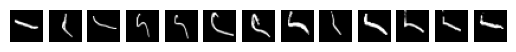

In [336]:
# take a look at some far way points for number 6
show_data(img_data, error_data[6])

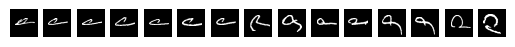

In [337]:
# take a look at some far way points for number 9
show_data(img_data, error_data[9][:15])

From above plots, we can see the handwritting of Arabic "6" and "9" are really similar sometimes; for example, the 7th image of number "6" and the 13rd image of number "9". It is why "6" and "9" are easy to be incorrectly classified.

Part of the far way points for different numbers.

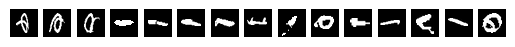

In [338]:
# some far way points for number 0
show_data(img_data, error_data[0][:15])

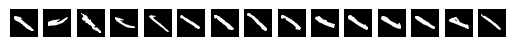

In [339]:
# some far way points for number 1
show_data(img_data, error_data[1][:15])

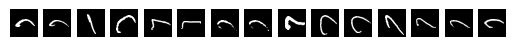

In [340]:
# some far way points for number 2
show_data(img_data, error_data[2][:15])

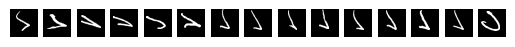

In [341]:
# some far way points for number 7
show_data(img_data, error_data[7][:15])

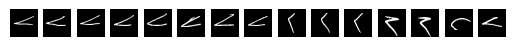

In [342]:
# some far way points for number 8
show_data(img_data, error_data[8][:15])

From the t-SNE plot and above images, we can find that **some numbers could also be possibly incorrectly classified** are:<br>

---


9 -> 1<br>
6 -> 1<br>
2 -> 3<br>
7 -> 3<br>
8 -> 3<br>
1 -> 4<br>
0 -> 9<br>
8 -> 9<br>
